# Data Wrangling and EDA (Brain Tumor Classification)

## Step 1: Importing Libraries

In [34]:
import os, sys
import cv2
import PIL
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps
import scipy.ndimage as ndi
from skimage import color
from skimage.filters import gaussian

## Step 2: Inspecting the Data Directories

In [2]:
# Data directories
data_path = "../BrainTumorData/"
os.listdir(data_path)

['Testing', 'Training', 'Validation']

In [3]:
# Training subfolders
os.listdir(data_path+'Training')

['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

In [4]:
# Validation subfolders
os.listdir(data_path+'Validation')

['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

In [5]:
# Testing subfolders
os.listdir(data_path+'Testing')

['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

In [6]:
# Training Directories
glioma_path_tr = "../BrainTumorData/Training/Glioma/"
notumor_path_tr = "../BrainTumorData/Training/NoTumor/"
pituitary_path_tr = "../BrainTumorData/Training/Pituitary/"
meningioma_path_tr = "../BrainTumorData/Training/Meningioma/"

training_paths = [glioma_path_tr, pituitary_path_tr, meningioma_path_tr, notumor_path_tr]


In [7]:
# Validation Directories
glioma_path_ve = "../BrainTumorData/Validation/Glioma/"
notumor_path_ve = "../BrainTumorData/Validation/NoTumor/"
pituitary_path_ve = "../BrainTumorData/Validation/Pituitary/"
meningioma_path_ve = "../BrainTumorData/Validation/Meningioma/"

validation_paths = [glioma_path_ve, pituitary_path_ve, meningioma_path_ve, notumor_path_ve]

In [8]:
# Test Directories
glioma_path_te = "../BrainTumorData/Testing/Glioma/"
notumor_path_te = "../BrainTumorData/Testing/NoTumor/"
pituitary_path_te = "../BrainTumorData/Testing/Pituitary/"
meningioma_path_te = "../BrainTumorData/Testing/Meningioma/"

test_paths = [glioma_path_te, pituitary_path_te, meningioma_path_te, notumor_path_te]

## Step 3: Inspecting the Image File Format

In [9]:
# Checking Image File Format other than [.jpg] for Training Set
count = 0
for path in training_paths:
    list_images = os.listdir(path)
    for i in list_images:
        if i.split('.')[-1] != 'jpg':
            count += 1
            # print('Other Format Found')
        else:
            continue
print(f'Other Than [.jpg]: {count}')

Other Than [.jpg]: 0


In [10]:
# Checking Image File Format other than [.jpg] for Validation Set
count = 0
for path in validation_paths:
    list_images = os.listdir(path)
    for i in list_images:
        if i.split('.')[-1] != 'jpg':
            count += 1
            #print('Other Format Found')
        else:
            continue
print(f'Other Than [.jpg]: {count}')

Other Than [.jpg]: 0


In [11]:
# Checking Image File Format other than [.jpg] for Testing Set
count = 0
for path in test_paths:
    list_images = os.listdir(path)
    for i in list_images:
        if i.split('.')[-1] != 'jpg':
            count += 1
            #print('Other Format Found')
        else:
            continue
print(f'Other Than [.jpg]: {count}')

Other Than [.jpg]: 0


## Step 4: Visualizing the Different Tumor Classes

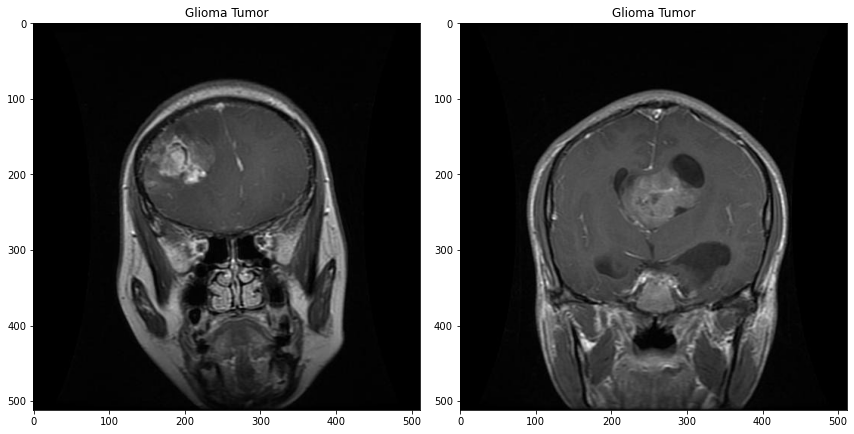

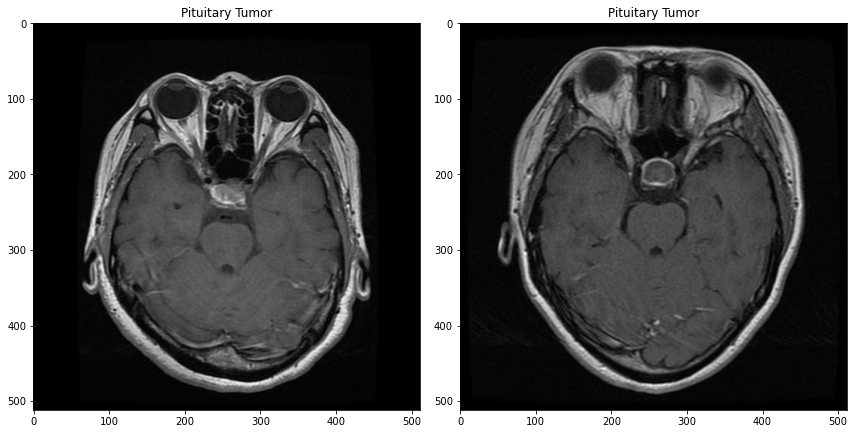

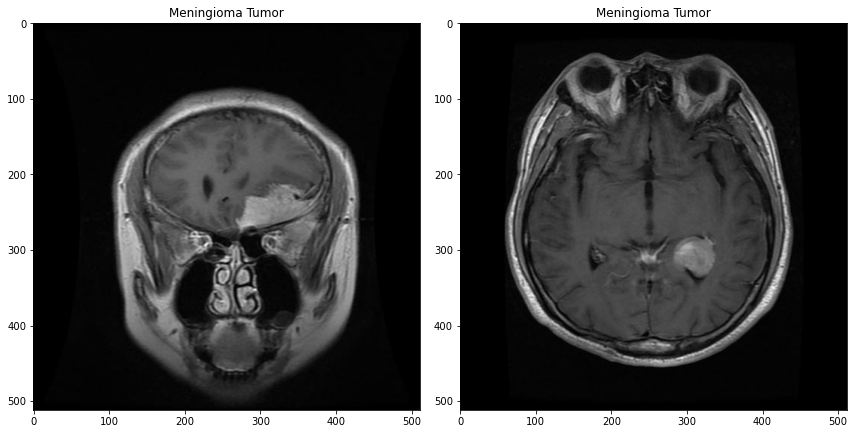

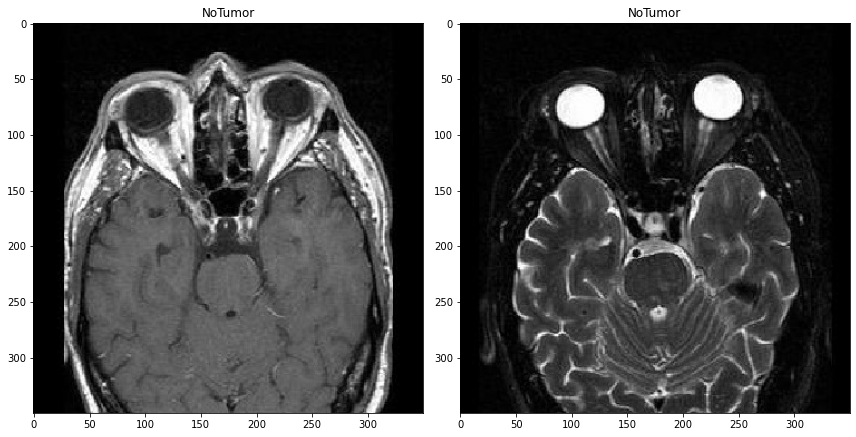

In [12]:
# Visualizing all different tumor types in training dataset and 
# The respective size of the images

for path in training_paths:
    list_images = os.listdir(path)
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
    for i in range(2):
        # plt.figure()
        array = plt.imread(os.path.join(path, list_images[i]))
        ax[i].imshow(array)
        if path.split('/')[-2] == 'NoTumor':
            ax[i].set_title(path.split('/')[-2])
        else:
            ax[i].set_title(path.split('/')[-2]+' Tumor')
        plt.savefig(f"../Figures/{path.split('/')[-2]}.jpg")
    fig.tight_layout()

#### Meningioma Tumor
Meningioma is the most common primary brain tumor, accounting for more than 30% of all brain tumors. Meningiomas originate in the meninges, the outer three layers of tissue that cover and protect the brain just under the skull. Women are diagnosed with meningiomas more often than men. About 85% of meningiomas are noncancerous, slow-growing tumors. Almost all meningiomas are considered benign, but some meningiomas can be persistent and come back after treatment.

#### Pituitary Tumor
A pituitary tumor is an abnormal growth in the pituitary gland. The pituitary is a small gland in the brain. It is located behind the back of the nose. It makes hormones that affect many other glands and many functions in your body. Most pituitary tumors are not cancerous (benign). They don’t spread to other parts of your body. But they can cause the pituitary to make too few or too many hormones, causing problems in the body.

#### Glioma Tumor:
Gliomas are the most prevalent type of adult brain tumor, accounting for 78 percent of malignant brain tumors. They arise from the supporting cells of the brain, called the glia. These cells are subdivided into astrocytes, ependymal cells and oligodendroglial cells (or oligos). Glial tumors include the following:

#### No Tumor
There is no tumor present in the brain cell.

## Step 5: Inspecting a Single RGB Image

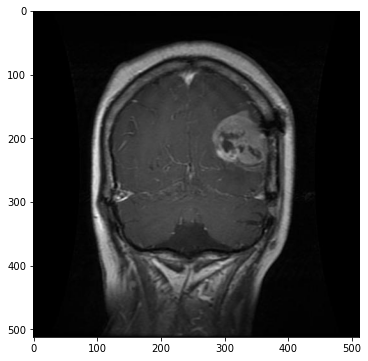

Size :786432 
Shape: (512, 512, 3) 
Data Type: uint8


In [13]:
# Inspecting the size, shape, and data-type of a single image
plt.figure(figsize=(6,6))
image_array = plt.imread("../BrainTumorData/Training/Glioma/Tr-gl_0021.jpg")
plt.imshow(image_array)
plt.show()
print(f"Size :{image_array.size} \nShape: {image_array.shape} \nData Type: {image_array.dtype}")

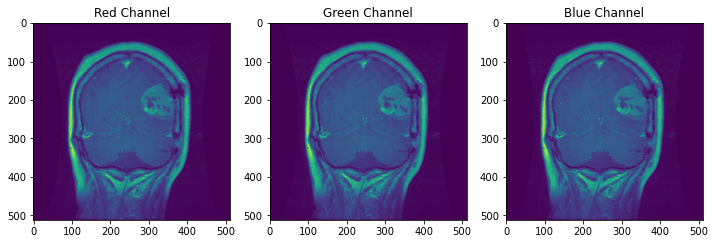

In [14]:
# Inspecting the different channels of the RGB image
red_channel = image_array[:,:,0]
green_channel = image_array[:,:,1]
blue_channel = image_array[:,:,2]
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4))
ax[0].imshow(red_channel)
ax[0].set_title('Red Channel')
ax[1].imshow(green_channel)
ax[1].set_title('Green Channel')
ax[2].imshow(blue_channel)
ax[2].set_title('Blue Channel')
plt.show()
fig.tight_layout()

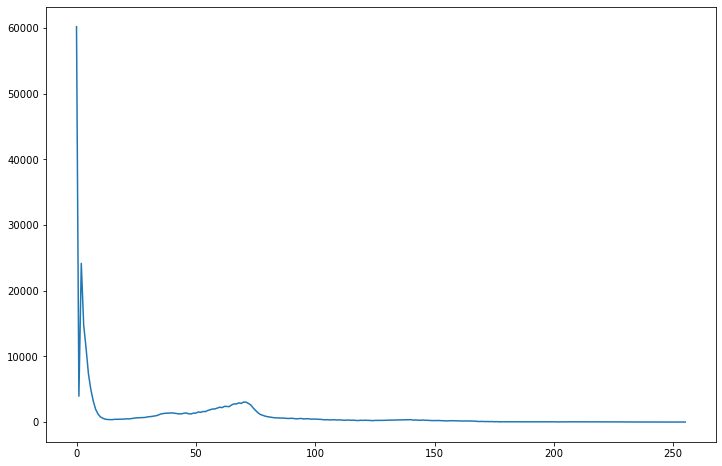

In [15]:
# Inspecting the green channel of the RGB Image using scipy.ndimage
plt.figure(figsize=(12,8))
hist = ndi.histogram(green_channel, min=0, max=255, bins=256)
plt.plot(hist)
plt.show()

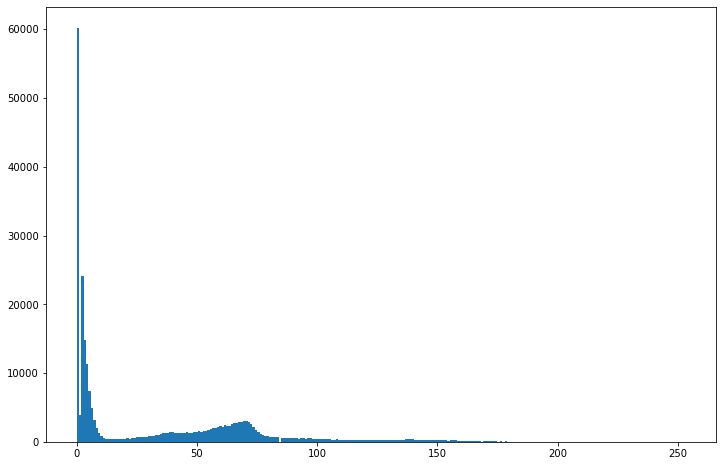

In [16]:
# Visualizing the histogram red channel of the RGB image using matplotlib.pyplot
plt.figure(figsize=(12,8))
plt.hist(red_channel.ravel(), bins=256)
plt.show()

Shape: (512, 512)


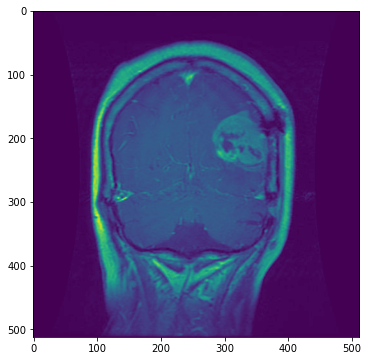

In [17]:
# The gray scale of the RGB images
plt.figure(figsize=(6,6))
gray_image = color.rgb2gray(image_array)
print("Shape:", gray_image.shape)
plt.imshow(gray_image)

## Step 6: Filtering, Sharpening, Manually Segmenting

Text(0.5, 1.0, 'Reduced sharpness')

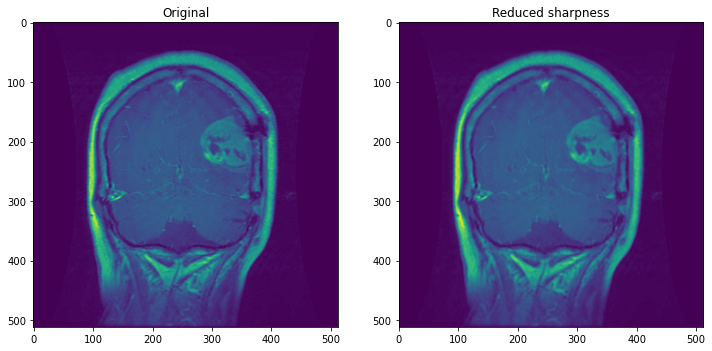

In [18]:
# Reducing Sharpness using filter
gaussian_image = gaussian(gray_image, multichannel=True)

# Show original and resulting image to compare
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].imshow(gray_image)
ax[0].set_title('Original')
ax[1].imshow(gaussian_image)
ax[1].set_title('Reduced sharpness')

The original image looks better quality than filtered image.

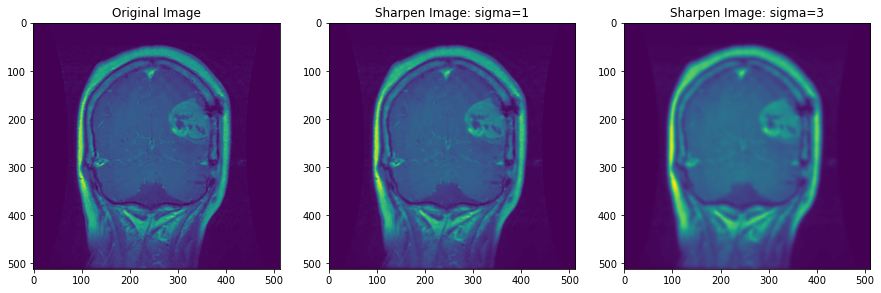

In [19]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(gray_image, sigma=1)
im_s3 = ndi.gaussian_filter(gray_image, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3, figsize=(15,10))
axes[0].imshow(gray_image)
axes[0].set_title("Original Image")
axes[1].imshow(im_s1)
axes[1].set_title("Sharpen Image: sigma=1")
axes[2].imshow(im_s3)
axes[2].set_title("Sharpen Image: sigma=3")
plt.show()

The original image looks better quality than sharpen image.

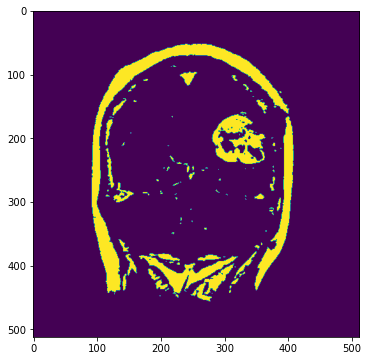

In [20]:
# Trying to manually segment and visualize the tumor area inside the head
plt.figure(figsize=(6,6))
# plt.imshow(gray>0.37)
# plt.imshow(array)
plt.imshow(image_array[:,:,0]>90)

## Step 7: Counting the total number of training, testing, and validation images and locating any grayscale images

In [21]:
# Checking for Gray Scale images in training datasets
train_count = 0
gray_count = 0
for path in training_paths:
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        try:
            channel = img_array.shape[2]
            if channel != 3:
                gray_count += 1
            else:
                train_count += 1
        except:
            pass
print(f"Total Grayscale Images: {gray_count}")
print(f'Total Training Images: {train_count}')

Total Grayscale Images: 0
Total Training Images: 4923


In [22]:
# Checking for Gray Scale images in validation datasets
validation_count = 0
gray_count = 0

for path in validation_paths:
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        try:
            channel = img_array.shape[2]
            if channel != 3:
                gray_count += 1
            else:
                validation_count += 1
        except:
            pass
        
print(f"Total Grayscale Images: {gray_count}")
print(f'Total Validation Images: {validation_count}') 

Total Grayscale Images: 0
Total Validation Images: 1052


In [23]:
# Checking for Gray Scale images in testing datasets
test_count = 0
gray_count = 0

for path in test_paths:
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        try:
            channel = img_array.shape[2]
            if channel != 3:
                gray_count += 1
            else:
                test_count += 1
        except:
            pass
        
print(f"Grayscale Images Found: {gray_count}")
print(f'Total Test Images: {test_count}')          

Grayscale Images Found: 0
Total Test Images: 1048


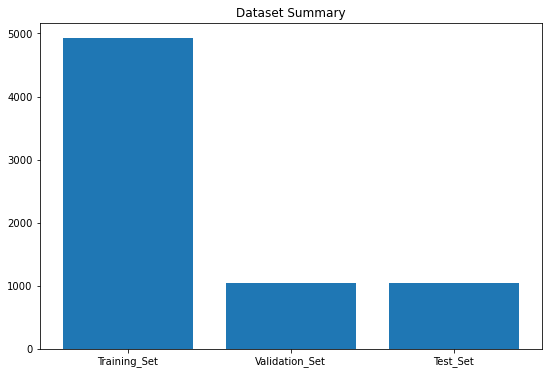

In [53]:
plt.figure(figsize=(9,6))
dataset = ['Training_Set', 'Validation_Set', 'Test_Set']
count = [train_count, validation_count, test_count]
plt.bar(dataset, count)
plt.title('Dataset Summary')
plt.savefig("../Figures/dataset_summary", dpi=95)
plt.show()

By inspecting the shape of the images in trainig, testing, and validation sub folders its visible that there is no gray scale images and all of the images are color image (RGB). There are 4956 trainig images, 1194 testing images, and 873 validation images.

## Step 8: Inspecting the height and width of the images in each training, testing, and validation subfolders

In [24]:
# Checking the image shape of each training subfolders before cropping and resizing

base_HW = 512
min_height = 512
min_width = 512
max_height = 512
max_width = 512
count = 0

for path in training_paths:
    
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        height, width, channel = img_array.shape
        
        if (height == base_HW) and (width == base_HW) and (channel == 3):
            continue
            
        elif ((height < base_HW) or (width < base_HW)) and ((height < min_height) or (width < min_width)):
            # print(f"{os.path.join(path, img_name)}")
            min_height = height
            min_width = width
            count += 1
            
        elif ((height > base_HW) or (width > base_HW)) and ((height > max_height) or (width > max_width)):
            # print(f"{os.path.join(path, img_name)}")
            max_height = height
            max_width = width
            count += 1
            
print(f"\nDifferent Shape Count: {count} \nMin Height: {min_height}, Min Width: {min_width} \
      \nMax Height: {max_height}, Max Width {max_width}")


Different Shape Count: 297 
Min Height: 198, Min Width: 150       
Max Height: 1080, Max Width 1920


Most of the images have a shape of (512, 512, 3). There are 297 training images that does not contain the same height and width or in other words they contain different shape than (512, 512). So, We need to resize the images in respective subfolders.

In [25]:
# Checking the image shape of each validation subfolders before cropping and resizing

base_HW = 512
min_height = 512
min_width = 512
max_height = 512
max_width = 512
count = 0

for path in validation_paths:
    
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        height, width, channel = img_array.shape
        
        if (height == base_HW) and (width == base_HW) and (channel == 3):
            continue
            
        elif ((height < base_HW) or (width < base_HW)) and ((height < min_height) or (width < min_width)):
            # print(f"{os.path.join(path, img_name)}")
            min_height = height
            min_width = width
            count += 1
            
        elif ((height > base_HW) or (width > base_HW)) and ((height > max_height) or (width > max_width)):
            # print(f"{os.path.join(path, img_name)}")
            max_height = height
            max_width = width
            count += 1
            
print(f"\nDifferent Shape Count: {count} \nMin Height: {min_height}, Min Width: {min_width} \
      \nMax Height: {max_height}, Max Width {max_width}")


Different Shape Count: 104 
Min Height: 192, Min Width: 192       
Max Height: 1075, Max Width 890


Most of the images have a shape of (512, 512, 3). There are 104 validation images that does not contain the same height and width or in other words they contain different shape than (512, 512). So, We need to resize the images in respective subfolders.

In [26]:
# Checking the image shape of each testing subfolders before cropping and resizing

base_hw = 512
min_height = 512
min_width = 512
max_height = 512
max_width = 512
count = 0

for path in test_paths:
    
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        height, width, channel = img_array.shape
        
        if (height == base_hw) and (width == base_hw) and (channel == 3):
            continue
            
        elif ((height < base_HW) or (width < base_HW)) and ((height < min_height) or (width < min_width)):
            # print(f"{os.path.join(path, img_name)}")
            min_height = height
            min_width = width
            count += 1
            
        elif ((height > base_HW) or (width > base_HW)) and ((height > max_height) or (width > max_width)):
            # print(f"{os.path.join(path, img_name)}")
            max_height = height
            max_width = width
            count += 1
            
print(f"\nDifferent Shape Count: {count} \nMin Height: {min_height}, Min Width: {min_width} \
      \nMax Height: {max_height}, Max Width {max_width}")


Different Shape Count: 171 
Min Height: 168, Min Width: 300       
Max Height: 1019, Max Width 1149


Most of the images have a shape of (512, 512, 3). There are 173 test images that does not contain the same height and width or in other words they contain different shape than (512, 512). So, We need to resize the images in respective subfolders.

## Step 9: Resizing, rgb to grayscale conversion, and save them to a new directory for modeling

In [27]:
# New Training Directories
new_glioma_path_tr = "../BrainTumorDataClean/Training/Glioma/"
new_notumor_path_tr = "../BrainTumorDataClean/Training/NoTumor/"
new_pituitary_path_tr = "../BrainTumorDataClean/Training/Pituitary/"
new_meningioma_path_tr = "../BrainTumorDataClean/Training/Meningioma/"

new_training_paths = [new_glioma_path_tr, new_pituitary_path_tr, new_meningioma_path_tr, new_notumor_path_tr]

# New Validation Directories
new_glioma_path_ve = "../BrainTumorDataClean/Validation/Glioma/"
new_notumor_path_ve = "../BrainTumorDataClean/Validation/NoTumor/"
new_pituitary_path_ve = "../BrainTumorDataClean/Validation/Pituitary/"
new_meningioma_path_ve = "../BrainTumorDataClean/Validation/Meningioma/"

new_validation_paths = [new_glioma_path_ve, new_pituitary_path_ve, new_meningioma_path_ve, new_notumor_path_ve]

# New Test Directories
new_glioma_path_te = "../BrainTumorDataClean/Testing/Glioma/"
new_notumor_path_te = "../BrainTumorDataClean/Testing/NoTumor/"
new_pituitary_path_te = "../BrainTumorDataClean/Testing/Pituitary/"
new_meningioma_path_te = "../BrainTumorDataClean/Testing/Meningioma/"

new_test_paths = [new_glioma_path_te, new_pituitary_path_te, new_meningioma_path_te, new_notumor_path_te]

In [28]:
# Set Image Size for Resizing
image_size = 128

In [29]:
# Training dataset
# rgb to gray conversion
# resizing into (img_size, img_size)

for path, new_path in zip(training_paths, new_training_paths):
    
    for img_name in os.listdir(path):
        
        if os.path.isfile(path+img_name):
        
            old_dir = path+img_name
            new_dir = new_path+img_name
            img = Image.open(old_dir)
            
            try:
                img_gray = ImageOps.grayscale(img)
                resized_gray = img_gray.resize((image_size,image_size), PIL.Image.ANTIALIAS)
                resized_gray.save(new_dir, quality=95)
            except ValueError:
                print("There is something wrong")

In [30]:
# Validation dataset
# rgb to gray conversion
# resizing into (img_size, img_size)

for path, new_path in zip(validation_paths, new_validation_paths):
    
    for img_name in os.listdir(path):
        
        if os.path.isfile(path+img_name):
        
            old_dir = path+img_name
            new_dir = new_path+img_name
            img = Image.open(old_dir)
            
            try:
                img_gray = ImageOps.grayscale(img)
                resized_gray = img_gray.resize((image_size,image_size), PIL.Image.ANTIALIAS)
                resized_gray.save(new_dir, quality=95)
            except ValueError:
                print("There is something wrong")

In [31]:
# test dataset
# rgb to gray conversion
# resizing into (img_size, img_size)

for path, new_path in zip(test_paths, new_test_paths):
    
    for img_name in os.listdir(path):
        
        if os.path.isfile(path+img_name):
        
            old_dir = path+img_name
            new_dir = new_path+img_name
            img = Image.open(old_dir)
            
            try:
                img_gray = ImageOps.grayscale(img)
                resized_gray = img_gray.resize((image_size,image_size), PIL.Image.ANTIALIAS)
                resized_gray.save(new_dir, quality=95)
            except ValueError:
                print("There is something wrong")

## Step 10: Inspecting the new resized and grayscale images

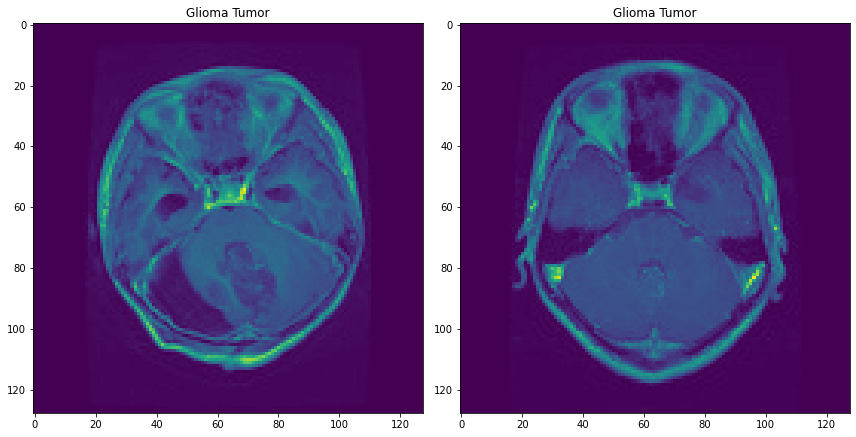

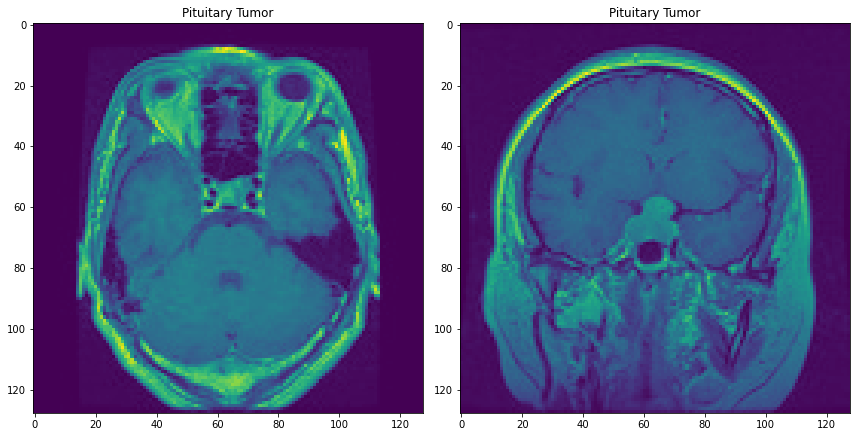

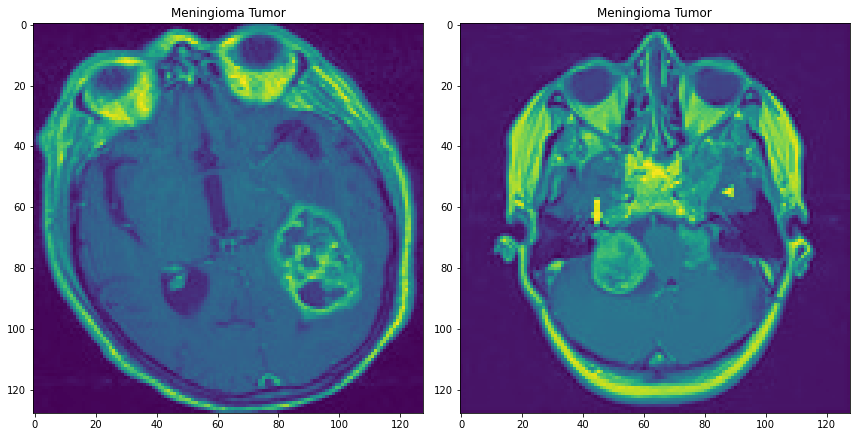

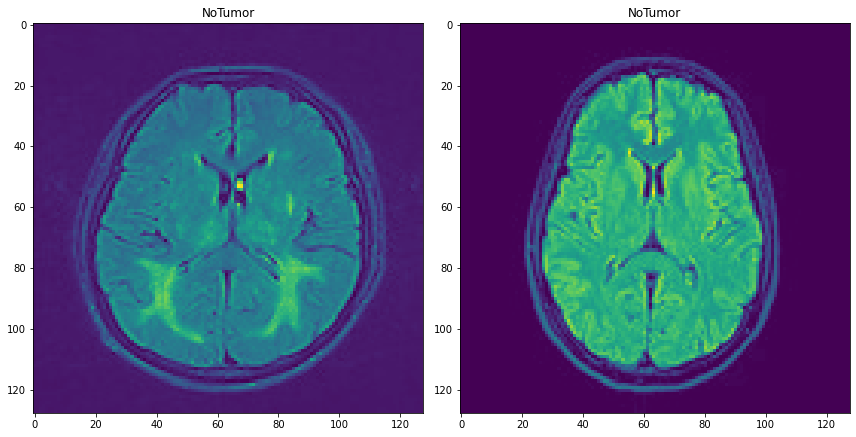

In [32]:
# Visualizing the new images of different class in test datasets

for path in new_test_paths:
    list_images = os.listdir(path)
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
    for i in range(2):
        # plt.figure()
        array = plt.imread(os.path.join(path, list_images[i]))
        ax[i].imshow(array)
        if path.split('/')[-2] == 'NoTumor':
            ax[i].set_title(path.split('/')[-2])
        else:
            ax[i].set_title(path.split('/')[-2]+' Tumor')
        plt.savefig(f"../Figures/Resized {path.split('/')[-2]}.jpg")
    fig.tight_layout()